# Spectrogram

This notebook demonstrates how to use YASA to plot a multi-taper spectrogram of a full-night single-channel EEG recording.

Please make sure to install YASA first by typing the following line in your terminal or command prompt:

`pip install --upgrade yasa`

You will also need the [lspopt](https://github.com/hbldh/lspopt) package

`pip install --upgrade lspopt`

In [1]:
import yasa
import numpy as np
import matplotlib.pyplot as plt

## Load the data and hypnogram

We first load a full-night 3-channels dataset (Cz, Fz, Pz) sampled at 100 Hz. The data is in compressed NumPy format (*.npz*).

In [2]:
# Load EEG data
f = np.load('data_full_6hrs_100Hz_Cz+Fz+Pz.npz')
data, ch_names = f['data'], f['chan']
sf = 100.
times = np.arange(data.size) / sf

print(data.shape, ch_names)
print(np.round(data[:, 0:5], 3))

(3, 2161058) ['Cz' 'Fz' 'Pz']
[[15.797 22.307 39.922 25.657 27.094]
 [16.896 26.385 40.966 21.833 24.456]
 [ 5.899 14.297 36.592 26.094 23.395]]


In [3]:
# For the sake of the example, we'll focus on CZ
data_cz = data[0, :]
data_cz.shape

(2161058,)

**Multi-taper spectrogram without the hypnogram**

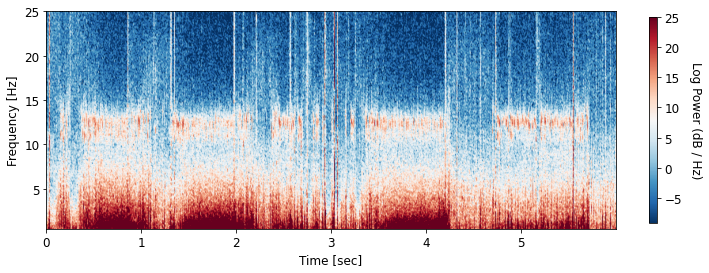

In [4]:
fig = yasa.plot_spectrogram(data_cz, sf)

**Multi-taper spectrogram with the hypnogram***

Next, we load the sleep staging vector (a.k.a hypnogram), which is a simple text file in which each value represents 30 seconds of data. Sleep stages are encoded as integer (*0: Wake, 1: N1 sleep, 2: N2 sleep, 3: N3 sleep, 4: REM sleep*).

In the code below, we load our 30-sec hypnogram and upsample it to match the sampling frequency and length of data, using YASA's built-in [hypno_upsample_to_data](https://raphaelvallat.com/yasa/build/html/generated/yasa.hypno_upsample_to_data.html#yasa.hypno_upsample_to_data) function.

Please refer to [08_bandpower.ipynb](08_bandpower.ipynb) for more details on how to manipulate hypnogram in YASA.

In [5]:
hypno_30s = np.loadtxt('data_full_6hrs_100Hz_hypno_30s.txt')
hypno = yasa.hypno_upsample_to_data(hypno=hypno_30s, sf_hypno=(1/30), data=data, sf_data=sf)
print(hypno.shape, 'Unique values =', np.unique(hypno))

07-Apr-20 10:21:38 | WARNING | Hypnogram is SHORTER than data by 10.58 seconds. Padding hypnogram with last value to match data.size.


(2161058,) Unique values = [0. 1. 2. 3. 4.]


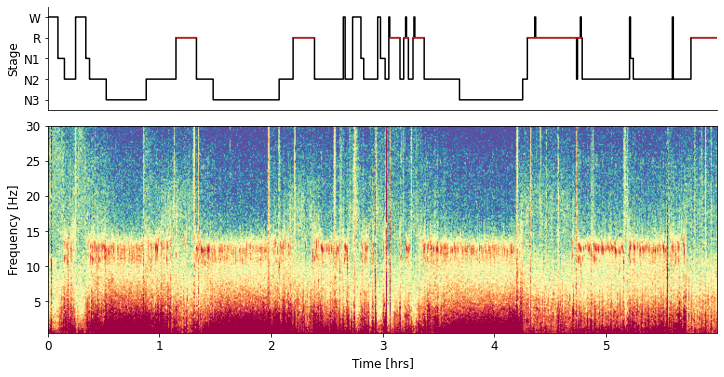

In [6]:
fig = yasa.plot_spectrogram(data_cz, sf, hypno=hypno, fmax=30, cmap='Spectral_r', trimperc=5)